# Линейная алгебра. Лабораторная работа 1, осень 2021


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)` и `np.dot(A, B)`, `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1.   В первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;
2.   Поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была -- как они справлялись;
3.   Попросите помощи у вашего учебного ассистента.

Важно искать помощь именно в таком порядке! Если ни один из шагов выше не помог или вы столкнулись с ситуацией, в которой вам заведомо не поможет ни один из пунктов выше (например, в задании вас просят доказать заведомо ложное утверждение), тогда можете написать сюда: st-fedotov@yandex-team.ru (Станислав Федотов, выступал перед выдачей лабораторной), или сюда: [@johanDDC](https://t.me/johanDDC) (Ваня Пешехонов, ассистент курса).



**И всё-таки задание**

**Задание 1.1 [0.2 за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

In [3]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
Z=np.zeros((3,4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

In [411]:
A=np.diag((1,2,3,4,5))
print(A)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

In [412]:
trace=np.trace(A)
print(trace)

15


- найдите обратную к ней матрицу;

In [413]:
A_reverse=sla.inv(A)
print(A_reverse)

[[ 1.          0.          0.          0.         -0.        ]
 [ 0.          0.5         0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


- сгенерируйте случайную матрицу $X$ размера $4\times5$;

In [414]:
X=np.random.rand(4,5)
print(X)

[[0.74982317 0.50323402 0.59325541 0.0316601  0.06693027]
 [0.77235526 0.02451383 0.70102422 0.27618618 0.74174733]
 [0.31587623 0.94922822 0.78924499 0.16614629 0.56122915]
 [0.21839334 0.72516643 0.19734815 0.63830809 0.64664955]]


- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

In [415]:
minor_det=sla.det(X[1:3,:2])
print(minor_det)

0.7253980712888235


- найдите произведение $X^TX$.

In [416]:
mul_X=X.T @ X
print(mul_X)

[[1.30624087 0.85448006 1.27867966 0.42893722 0.94158122]
 [0.85448006 1.68074596 1.20801496 0.64329316 1.05352774]
 [1.27867966 1.20801496 1.5052409  0.46949477 1.13025198]
 [0.42893722 0.64329316 0.46949477 0.51232298 0.71298716]
 [0.94158122 1.05352774 1.13025198 0.71298716 1.28780256]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [0.75 баллов]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [33]:
# Приведём матрицу к верхнетругольному виду, а потом найдём произведение элементов на главной диагонали
from copy import deepcopy
def my_det(X):
    n = len(X)
    [a, b] = X.shape           #Проверка на квадратность
    if a != b:
        raise ValueError
    sign = 1
    for line in range(n):
        d_el = X[line, line]
        if d_el == 0 and line != n - 1:
            ind = 1
            while line + ind != n and X[line + ind, line] == 0:
                ind += 1
            if ind + line == n:
                return 0
            else:
                copy_line = deepcopy(X[line])                  #При смене строк местами изменяем знак определителя
                X[line] = X[line + ind]
                X[line + ind] = copy_line
                d_el = X[line, line]
                sign *= -1        
        for i in range(line+1, n):
            for j in range(n):
                X[i,j] -= X[i,line] * X[line,j] / d_el        #Вычитаем из каждого элемента столбца диагональный элемент
    return X.diagonal().prod() * sign                         #Определитель будет равен произведению элементов на главной диагонали, умноженной на знак 

Простая проверка:

In [35]:
import numpy as np
R = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(f'library function: {np.linalg.det(R)}\nmy function: {my_det(R)}')

library function: -1.0
my function: -1


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [36]:
for _ in range(10):
    Xy = np.random.rand(8, 8)
    if np.abs(my_det(Xy) - sla.det(Xy)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

27.6 µs ± 4.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
942 µs ± 9.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
234 µs ± 7.89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
947 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 5.65 times longer than the fastest. This could mean that an intermediate result is being cached.
35.4 ms ± 28.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<ipython-input-6-6bc8ecc00d52>:25: RuntimeWarning: overflow encountered in double_scalars
  X[i,j] -= X[i,row] * X[row,j] / d_el         #Вычитаем из каждого элемента столбца диагональный элемент
<ipython-input-6-6bc8ecc00d52>:25: RuntimeWarning: invalid value encountered in double_scalars
  X[i,j] -= X[i,row] * X[row,j] / d_el         #Вычитаем из каждого элемента столбца диагональный элемент
C:\Users\Almas\anaconda3\lib\site-packages\numpy\core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


15min 32s ± 59.1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


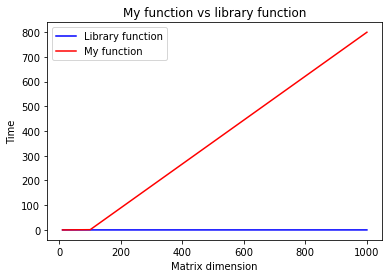

In [9]:
lib_times = []
my_times = []
dimensions = [10, 100,1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

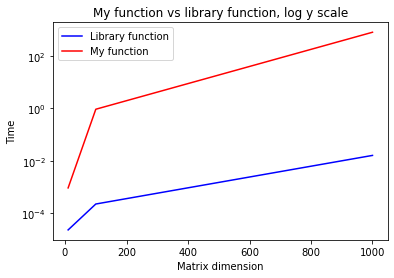

In [10]:
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.5 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [11]:
a = np.array([[1, 0], [10 ** 20, 1]])
b = np.array([[10 ** -20, 1], [0, 1 - 10 ** 20]])
print(a @ b)

[[1e-20 1]
 [1.0 1]]


In [12]:
c = np.array([[1., 0.], [10. ** 20, 1.]])
d = np.array([[10. ** -20, 1.], [0., 1. - 10. ** 20]])
print(c @ d)

[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
Как видно из ответов, второй результат содержит неопределённость 0^0, поэтому первый ответ правильный.

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [13]:
from math import comb
def my_pascal(dim):
    a = np.zeros((dim, dim))         #Создадим "пустую" матрицу(все элементы нули)
    for i in range(dim):
        for j in range(dim):
            a[i][j] = comb(j + i, i) #Элементу на ij месте будем присваивать значение С из i+j по i
    return a

Чему равен её определитель? Строго поясните свой ответ.

----
Воспользуемся таким алгоритмом: будем вычитать из i-ой строки i-1, начиная с конца(то есть из последней предпоследнюю,..., из второй первую;на следующем шаге сделаем тоже самое, но уже не будем вычитать первую из второй(то есть последнее действие - это из третьей вычтем вторую;думаю, что дальше идея ясна; когда мы дойдём до конца таких преобразований, мы получим нижнетреугольную матрицу, а как мы помним, её определитель равен произведению элементов на главной диагнали, а там у нас везде 1-> определитель равен 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [14]:
print(sla.det(my_pascal(30)))

7.223813481546793e+47


Разница заметна невооружённым взглядом!

Как вы помните из лекций, квадратная матрица называется вырожденной, если её определитель равен нулю. На практике часто приходится иметь дело с матрицами, "близкими" к вырожденным. Вырожденные и близкие к вырожденным матрицы обладают мерзким свойством численной неустойчивости. Что такое численная неустойчивость? Скажем, пусть мы решаем систему $Ax = b$, и пусть $\dot x$ -- её частное решение. Теперь предположим, что правая часть системы немного испортилась (например, если правая часть -- это выход какого-то алгоритма, то тогда она может испортиться из-за неточных вычислений в этом алгоритме), и теперь мы решаем систему $Ax = b + \Delta b$. Если элементы вектора $\Delta b$ невелики по модулю, нам бы очень хотелось, чтобы и решение новой системы не сильно отличалось от решения исходной системы. Именно это мы и будем называть численной устойчивостью.

**Задание 3.3 [0.15 балла]** Дана система
$$
\begin{cases}
x_1 + 1000x_2 = 2004\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$
Найдите решение этой системы (можно устно). Найдите определитель её матрицы коэффициентов.

In [40]:
A1= np.array([[1, 1000], [100, 100001]])
b1= np.array([2004, 200402])
x = np.linalg.solve(A1, b1)      #Воспользуемся встроеной функцие по поиску решений
[x1,x2] = x.tolist()             #Чтобы красиво вывести корни, преобразуем матрицу решений в список
print(f'x1={x1}\nx2={x2}')
print(int(sla.det(A1)))                #Найдём определитель матрицы коэффициентов с помощью my_det

x1=4.0
x2=2.0
1


Теперь немного испортим правую часть этой системы, пусть теперь она имеет вид
$$
\begin{cases}
x_1 + 1000x_2 = 2004.01\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$

Найдите решение системы с испорченной правой частью. Сравните решения исходной и новой систем. Что вы можете сказать?

In [16]:
A2=np.array([[1,1000],[100,100001]])    #Всё то же самое, как и в прошлом вводе
b2=b=np.array([2004.01,200402])
y = np.linalg.solve(A2, b2)
[x1,x2] = y.tolist()
print(f'x1={x1}\nx2={x2}')

x1=1004.01
x2=1.0


Как можно заметить, решения у систем (1) и (2) разные. А это значит, что наша система численно неустойчивая.

Оказывается, что значение определителя довольно плохо измеряет степень отклонения данной матрицы от вырожденной. Хорошей метрикой в этом плане является число обусловленности матрицы.

**Определение**. Пусть $A$ -- квадратная матрица порядка $n$. Числом обусловленности матрицы $A$ назовём число $\mathrm{cond}(A)$, определяемое по формуле
$$
\mathrm{cond}(A) = \sqrt{\mathrm{tr}(A^TA)\mathrm{tr}((A^{-1})^TA^{-1})}
$$
Если матрица вырожденна, то $\mathrm{cond}(A)$ положим равным бесконечности.

Как можно догадаться из определения, матрица тем ближе к вырожденной, чем больше её число обусловленности, ведь у вырожденной матрицы это число равно бесконечности!

**Задание 3.4 [0.2 баллов]** Напишите функцию, которая для заданной матрицы $A$ возвращает её число обусловленности. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [17]:
def my_cond(A):
    [a, b] = A.shape           #Проверка на квадратность
    if a != b:
        raise ValueError
    else:
        if np.linalg.det(A) != 0:      #Если невырожденная, то считаем по формуле, в противном случае выводим бесконечность
            A_1 = sla.inv(A)
            return (np.trace(A.T @ A) * np.trace(A_1.T @ A_1)) ** 0.5
        else:
            return np.inf

Посчитайте число обусловленности матрицы из задания 3.3.

In [18]:
A1 = np.array([[1, 1000], [100, 100001]])
print(my_cond(A1))

3756921844.554971


Постройте график зависимости числа обусловленности матрицы Паскаля от размера $n \in [5, 30]$.

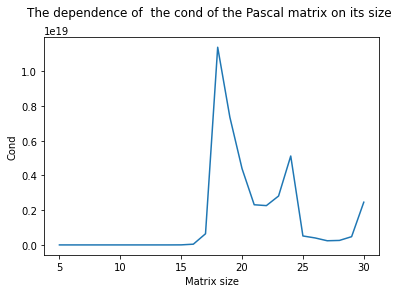

In [19]:
x_line = list(range(5, 31))                         #По OX у нас будут размеры матриц(от 5 до 30)
y_line = list(map(my_cond, map(sla.pascal, x_line)))#По OY у нас будут их condы
plt.plot(x_line, y_line)
plt.title('The dependence of  the cond of the Pascal matrix on its size \n')
plt.ylabel('Cond')
plt.xlabel('Matrix size')
plt.show()

Как видите, посчитанные выше числа обусловленности весьма велики, что вполне согласуется с численными эффектами, которые вы наблюдали ранее при работе с соответствующими матрицами.

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [20]:
def prod_and_sq_sum(A):
    return A.diagonal().prod(), np.trace(np.square(A))

In [21]:
def test1(A):
    prod=1
    sum=0
    for i in range(len(A)):
        prod*=A[i,i]
        sum+=A[i,i]**2
    return prod,sum

#Проверим результаты фуункции и теста. Если они равны, то выведем ОК.
quan=0
for i in range(10):
    Ar=np.random.rand(15,15)
    (prod1,sq_sum1)=prod_and_sq_sum(Ar)
    (prod2,sq_sum2)=test1(Ar)
    if abs(prod1-prod2)<1e-6 and abs(sq_sum1-sq_sum2)<1e-6:
        print('OK')

OK
OK
OK
OK
OK
OK
OK
OK
OK
OK


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы, $\lambda_1, \ldots, \lambda_n$ --- некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [22]:
def f(A,B,lmbd,k):
    #Если к больше количества столбцов, то сначала 𝜆𝑖 умножим на i-тый столбец, а дальше просто премножим то, что получилось на транспонированную матрицу
    #Ведь , если рассмотреть поочерёдное перемножение столбца на строку, а потом их суммирование, то это тоже самое, что перемножение строк двух матриц.
    #А т.к. матрицы перемножаются строка на столбец, то вторую матрицу надо транспонировать.
    m = A.shape[0]
    n = A.shape[1]
    if k >= n:
        new_A = A * lmbd.reshape((1, n))
        return new_A@B.T
    else: 
        new_A = A[:, :k] * lmbd[0][:k].reshape((1, k))
        return new_A@B[:, :k].T

In [23]:
import random                    #Решим это "в лоб"(просто находить каждое слагаемое суммы)
def test2(A,B,lmbd,k):
    m,n=A.shape
    sum = np.zeros((m,m))
    for i in range(min(n,k)): 
        new_b = np.array([[j[i] for j in B]])
        new_a = np.array([[j[i]] for j in A])
        sum += new_a@new_b* lmbd[0,i]
    return sum

for i in range(10):
    n=random.randint(1,10)
    m=random.randint(1,10)
    Ae=np.random.rand(m,n)
    Be=np.random.rand(m,n)
    lmbd=np.random.rand(1,n)
    k=random.randint(1,100)
    if np.allclose(f(Ae,Be,lmbd,k),test2(Ae,Be,lmbd,k)):   #Т.к. результат суммы- это матрица, ты проверим их на равенство с помощью np.allclose
        print('OK')

OK
OK
OK
OK
OK
OK
OK
OK
OK
OK


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [24]:
def get_diag(A,B):
    #Элемент ii -это произведение i-той строки на i-тый столбец. Используем поэлементное перемножение. Тогда чтобы всё было ок, транспонируем В
    return (A*B.T).sum(axis=1) #Чтобы получить диагональ произведения, осталось просуммировать строки.

In [25]:
def test3(A,B):
    return (A@B).diagonal()    #Просто перемножим матрицы и вернём диагональ


for i in range(10):
    Aw=np.random.rand(8,8)
    Bw=np.random.rand(8,8)
    if np.allclose(get_diag(Aw,Bw),test3(Aw,Bw)): #Раз результатом функции является диагональ в np.array, то сравним их allclose
        print('OK')

OK
OK
OK
OK
OK
OK
OK
OK
OK
OK


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.75 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.75 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.75 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [26]:
def shrink_rotate(X, A, coef=1., angle=0.):
    return (X-A)*coef*(np.cos(angle)+np.sin(angle)*1j)+A
    
def shrink_rotate_conj(X, A, coef=1., angle=0.):
        return ((X-A)*coef*(np.cos(angle)+np.sin(angle)*1j)).conjugate()
    
def geometric_inverse(X, A, r):
    return (r**2)*((X-A).conjugate()**(-1))+A

**Задание 5.4 [0.5 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

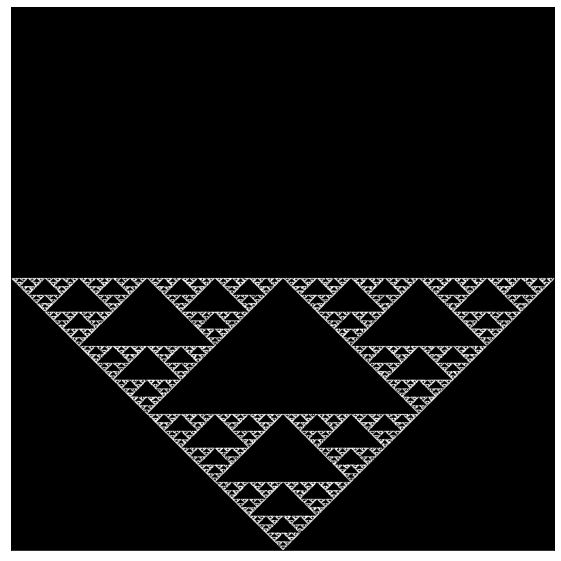

In [27]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

image=np.zeros((1000,1000))
for n_iter in range(10,max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    image[int((z.imag+1)*500),int((z.real+1)*500)]=1
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(image,cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Детальнее рассмотрим парметры функции shrink_rotate: мы берём вектор AX с координатами в зависимости от того, какой номер функции нам "выпал", укорачиваем его в двое(coef=0.5) и возвращаем его конец. Координаты, которые забиты в функции образуют треугольник. То есть, если выражаться простым языком, то мы просто рандомно выбираем куда поставить точку(конец нашего вектора). После 100000 итераций становится видно, что перед нами треугольник Серпинского. А вот объяснение, почему именно этот фрактал перед нами, у меня нет. Ведь это всё теория Хаоса и природа нахимичели.

Ну а с 10 итерации мы начинаем рисовать точки потому, чтобы точки, которые возможно будут попадать чуть не туда не портили нашу картинку, ведь на долгосроке все они всё равно войдут во фрактал.

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

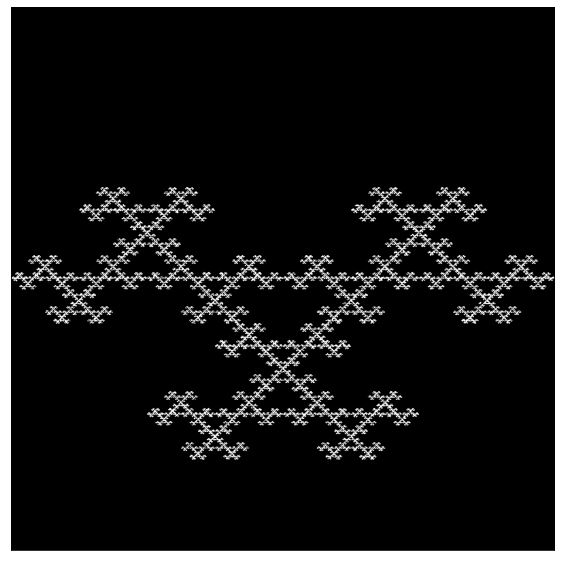

In [28]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate_conj(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

image=np.zeros((1000,1000))
for n_iter in range(10,max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    image[int((z.imag+1)*500),int((z.real+1)*500)]=1
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(image,cmap='gray')

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

771 µs ± 152 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
158 µs ± 61.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Number of operations of the Gauss method: 650
Number of operations of the A^-1*b method: 2
6.81 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
469 µs ± 5.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Number of operations of the Gauss method: 66250
Number of operations of the A^-1*b method: 2
22.9 ms ± 508 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.46 ms ± 61 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number of operations of the Gauss method: 515000
Number of operations of the A^-1*b method: 2
81.8 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.4 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number of operations of the Gauss method: 4060000
Number of operations of the A^-1*b method: 2


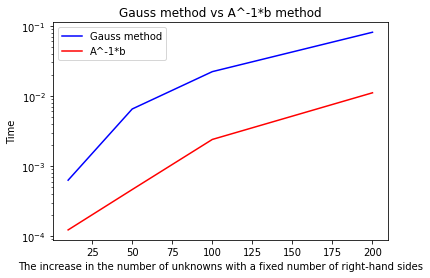

In [8]:
import scipy.linalg as sla
import matplotlib.pyplot as plt
def Gauss(a, b):
    count = 0
    n = len(a)
    for k in range(n):
        if np.fabs(a[k, k]) < 10 ** -12:
            for i in range(k + 1, n):
                if np.fabs(a[i, k]) > a[k, k]:
                    for j in range(k, n):
                        a[k, j], a[i, j] = a[i, j], a[k, j]
                        count += 1
                    b[k], b[i] = b[i], b[k]
                    count += 1
                    break
        pivot = a[k, k]
        for j in range(k, n):
            a[k, j] /= pivot
            count += 1
        b[k] /= pivot
        count += 1
        for i in range(n):
            if i == k or a[i, k] == 0: continue
            factor = a[i, k]
            for j in range(k, n):
                a[i, j] -= factor * a[k, j]
                count += 1
            b[i] -= factor * b[k]
            count += 1
    return b, count


def mul_inv(a, b):
    count = 0
    a_reverse = sla.inv(a)
    count += 1
    return a_reverse @ b, count + 1


Gauss_times1 = []
Reverse_times1 = []
dimensions1 = [10, 50, 100, 200, 500, 1000]
m = 10
for dim in dimensions1:
    A = np.random.rand(dim, dim)
    b = np.random.rand(dim, m)
    (X1,count1)=Gauss(A,b)
    (X2,count2)=mul_inv(A,b)
    res_Gauss1 = %timeit -o Gauss(A, b)
    Gauss_times1.append(res_Gauss1.best)
    res_Reverse1 = %timeit -o mul_inv(A, b)
    Reverse_times1.append(res_Reverse1.best)
    print(f'Number of operations of the Gauss method: {count1}\nNumber of operations of the A^-1*b method: {count2}')

plt.semilogy(dimensions1, Gauss_times1, color='blue', label='Gauss method')
plt.semilogy(dimensions1, Reverse_times1, color='red', label='A^-1*b')
plt.title('Gauss method vs A^-1*b method')
plt.ylabel('Time')
plt.xlabel('The increase in the number of unknowns with a fixed number of right-hand sides')
plt.legend()

22.9 ms ± 942 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.57 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number of operations of the Gauss method: 515000
Number of operations of the A^-1*b method: 2
24 ms ± 867 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.63 ms ± 608 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number of operations of the Gauss method: 515000
Number of operations of the A^-1*b method: 2
32.3 ms ± 9.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.1 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number of operations of the Gauss method: 515000
Number of operations of the A^-1*b method: 2
25.1 ms ± 784 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.16 ms ± 666 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number of operations of the Gauss method: 515000
Number of operations of the A^-1*b method: 2


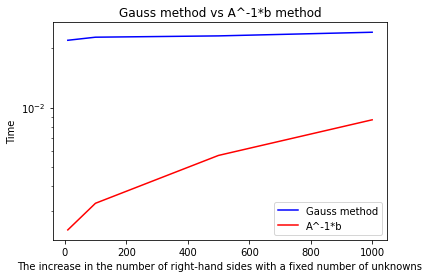

In [9]:
Gauss_times2 = []
Reverse_times2 = []
dimensions2 = [10, 100, 500, 1000, 2000, 5000, 10000]
n = 100
for dim in dimensions2:
    A = np.random.rand(n,n)
    b = np.random.rand(n,dim)
    (X1,count1)=Gauss(A,b)
    (X2,count2)=mul_inv(A,b)
    res_Gauss2 = %timeit -o Gauss(A, b)
    Gauss_times2.append(res_Gauss2.best)
    res_Reverse2 = %timeit -o mul_inv(A, b)
    Reverse_times2.append(res_Reverse2.best)
    print(f'Number of operations of the Gauss method: {count1}\nNumber of operations of the A^-1*b method: {count2}')

plt.semilogy(dimensions2, Gauss_times2, color='blue', label='Gauss method')
plt.semilogy(dimensions2, Reverse_times2, color='red', label='A^-1*b')
plt.title('Gauss method vs A^-1*b method')
plt.ylabel('Time')
plt.xlabel('The increase in the number of right-hand sides with a fixed number of unknowns')
plt.legend()

Графики посторены лишь для для первых 4 размеров из-за нехватки времени и работоспособности моего ноутбука:(